In [6]:
# import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the breast cancer dataset
X, y = l

# split the train and test dataset
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.20,
                                       random_state=23)
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 93.85964912280701


/Users/schlesinger/code/hong-kong-ai/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
data = load_breast_cancer()
print("Feature names:", data.feature_names)
print("Target names:", data.target_names)
print("Shape of feature matrix:", X.shape)
print("Shape of target array:", y.shape)
print("First 5 samples of feature matrix:\n", X[:5])
print("First 5 samples of target array:", y[:5])

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Shape of feature matrix: (569, 30)
Shape of target array: (569,)
First 5 samples of feature matrix:
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.

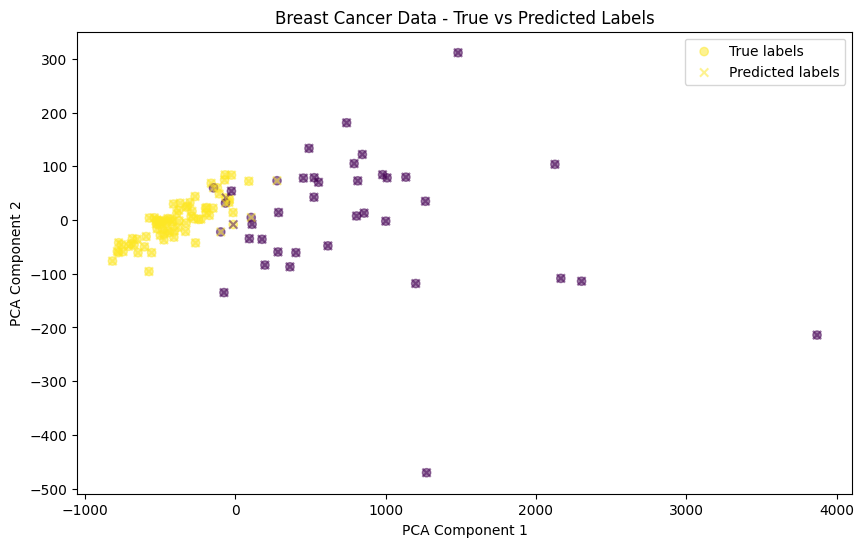

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Use PCA to reduce the dimensionality of the data to 2D
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Plot the data
plt.figure(figsize=(10, 6))

# Scatter plot of the true values
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, alpha=0.5, label='True labels')

# Scatter plot of the predicted values
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, marker='x', alpha=0.5, label='Predicted labels')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Breast Cancer Data - True vs Predicted Labels')
plt.legend()
plt.show()

## How does Logistic Regression work?

The logistic regression model transforms the linear regression function continuous value output into categorical value output using a sigmoid function, which maps any real-valued set of independent variables input into a value between 0 and 1. This function is known as the logistic function.

Let the independent input features be:

$$ 
X = 
\begin{bmatrix}
x_{11} & \ldots & x_{1m} \\
x_{21} & \ldots & x_{2m} \\
\vdots & \ddots & \vdots \\
x_{n1} & \ldots & x_{nm}
\end{bmatrix}
$$

and the dependent variable is $ Y $ having only binary value i.e. 0 or 1.

$$ 
Y = 
\begin{cases} 
0 \text{ if Class 1} \\ 
1 \text{ if Class 2} 
\end{cases}
$$

then, apply the multi-linear function to the input variables $ X $.

$$ 
z = \left( \sum_{i=1}^{n} w_i x_i \right) + b 
$$

Here $ x_i $ is the $i$-th observation of $ X $, $ w_i = [w_1, w_2, w_3, \ldots, w_m] $ is the weights or coefficients, and $ b $ is the bias term also known as intercept. Simply this can be represented as the dot product of weight and bias.

$$ 
z = w \cdot X + b 
$$

Whatever we discussed above is the linear regression. 

### Sigmoid Function

Now we use the sigmoid function where the input will be $ z $ and we find the probability between 0 and 1, i.e. predicted $ y $.

$$ 
\sigma(z) = \frac{1}{1 + e^{-z}} 
$$

The sigmoid function converts the continuous variable data into the probability i.e. between 0 and 1. 

$$ 
\sigma(z) \rightarrow 1 \text{ as } z \rightarrow \infty 
$$

$$ 
\sigma(z) \rightarrow 0 \text{ as } z \rightarrow -\infty 
$$

$$ 
\sigma(z) \text{ is always bounded between 0 and 1}
$$

where the probability of being a class can be measured as:

$$ 
P(y=1) = \sigma(z)
$$

$$ 
P(y=0) = 1 - \sigma(z)
$$
